# Clustering by KShape

In [1]:
%pip install -U -qqq scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import math
import os
import pickle

from _defaults import (
    CACHING_ENABLED,
    SEED,
    datasets_labels,
    get_data_hash_key,
    init_notebook,
    load_ballance_datasets,
    plot_clusters,
    print_db_length_table,
)
import matplotlib.pyplot as plt
import numpy as np

In [4]:
init_notebook()

Load (limited amount of) data.

In [5]:
data_limit = 100
_, (dataset, metadata, targets) = load_ballance_datasets(max_length=data_limit)

Load previous cached dataset from 'data/datasets-098bae95.pkl' file.


In [6]:
print_db_length_table(targets)

Dataset         Length
------------  --------
Fernverkehr        100
Güterzüge          100
Regioverkehr       100


A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN.

In [7]:
cluster_count = math.ceil(math.sqrt(len(dataset)))
print(cluster_count)

18


Prepare caching.

In [ ]:
data_hash = get_data_hash_key()

### KShape clustering (for time-series data)

In [9]:
from tslearn.clustering import KShape

In [10]:
cache_file = f"./cache/ts-kshape-{data_hash}-{cluster_count}-{data_limit}.pkl"

if CACHING_ENABLED and os.path.exists(cache_file):
    print(f"Load previous cached ts kshape from '{cache_file}' file.")
    with open(cache_file, "rb") as f:
        kS, y_pred = pickle.load(f)
else:
    # compute the kshape
    kS = KShape(n_clusters=cluster_count, n_init=2, random_state=SEED)
    y_pred = kS.fit_predict(dataset)
    if CACHING_ENABLED:
        with open(cache_file, "wb") as f:
            pickle.dump((kS, y_pred), f)

/home/hein_f0/dev/slki-code/.venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/hein_f0/dev/slki-code/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hein_f0/dev/slki-code/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hein_f0/dev/slki-code/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hein_f0/dev/slki-code/.ven

In [12]:
print("Cluster labels:", y_pred)

Cluster labels: [ 8  8  3  3  8  7  8 12 12 12  3  8  8  8  3  8 12  1 12  8  8  1  8  8
  8 12  3  3  3  3  3 12  3 12  8  3 12  8 12  8  3 12  8 12  7  3  8  4
  4  8 11  8  3  8 12  8  8  8  5  8  8  3  8  3 12  3  8 12 12 12  8 12
 12  8  8  3  3 12  3  3  8  6  8  8  3  3  3 13  8  3  8  8  8 12  3  8
 12  3  3  8  8  8 12  3 12  8 12 12  3  3 12  8  0  8  8 12  8  8 12  7
  8 12  8  8  4  3  3  8  7 12 14 12  3  8 15  3 12 12  2  3  3  3  8  8
  7  8 13  3 12  8  3 12  8 14  3  8 12  3  3  8  0  4  8 12 12  8 17 12
  8  8  3  8  8  3  8  3  3  3  8  3  8 12  8  6 12  8  3  7  8  9 12  3
  4  3  3  8  3  3  8 15  8  3  7  3  8  3 12 12  8  8  8 12 12 12 12  8
  3  8  8  3  8  8  3  3  3 12  8 12 12 12  3  8 12  7 16  3  3  8  8  8
  4 12  3 12  8 12  3  3  3 12 15 12  8  3  8  3  3 10  8 12  7  3  3  8
 12 12 12  3  8 12  8 16  7  8  3 12 12  3  3 12  8  8  3  3  3  8  8  3
  7  3  3 12  3 12  8  8  8  3 12  3]


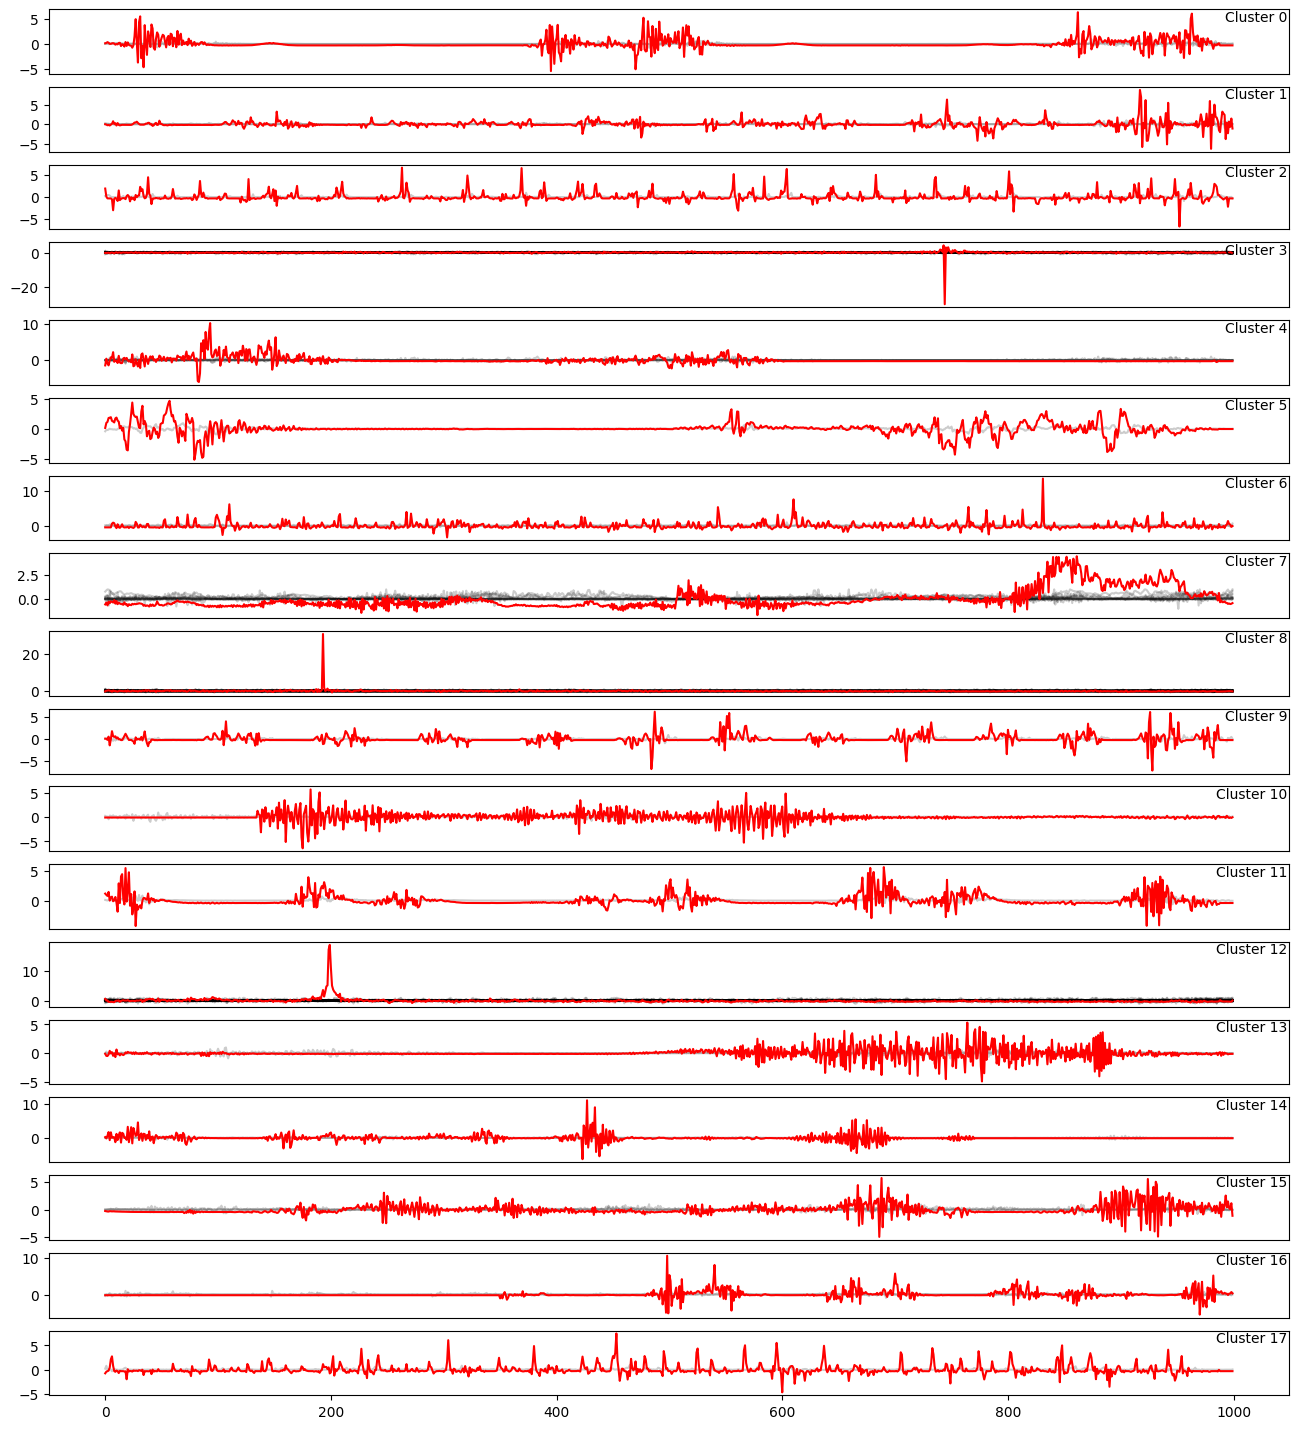

In [28]:
sz = dataset.shape[1]
fig, axes = plt.subplots(cluster_count, 1, figsize=(16, cluster_count))
for cluster_idx in range(cluster_count):
    ax = axes[cluster_idx]
    yi = cluster_idx
    for xx in dataset[y_pred == yi]:
        ax.plot(xx.ravel(), "k-", alpha=0.2)
    ax.plot(kS.cluster_centers_[yi].ravel(), "r-")
    ax.text(
        0.999,
        0.99,
        f"Cluster {cluster_idx}",
        ha="right",
        va="top",
        transform=ax.transAxes,
    )
    if cluster_idx != cluster_count - 1:
        ax.get_xaxis().set_ticks([])
plt.show()

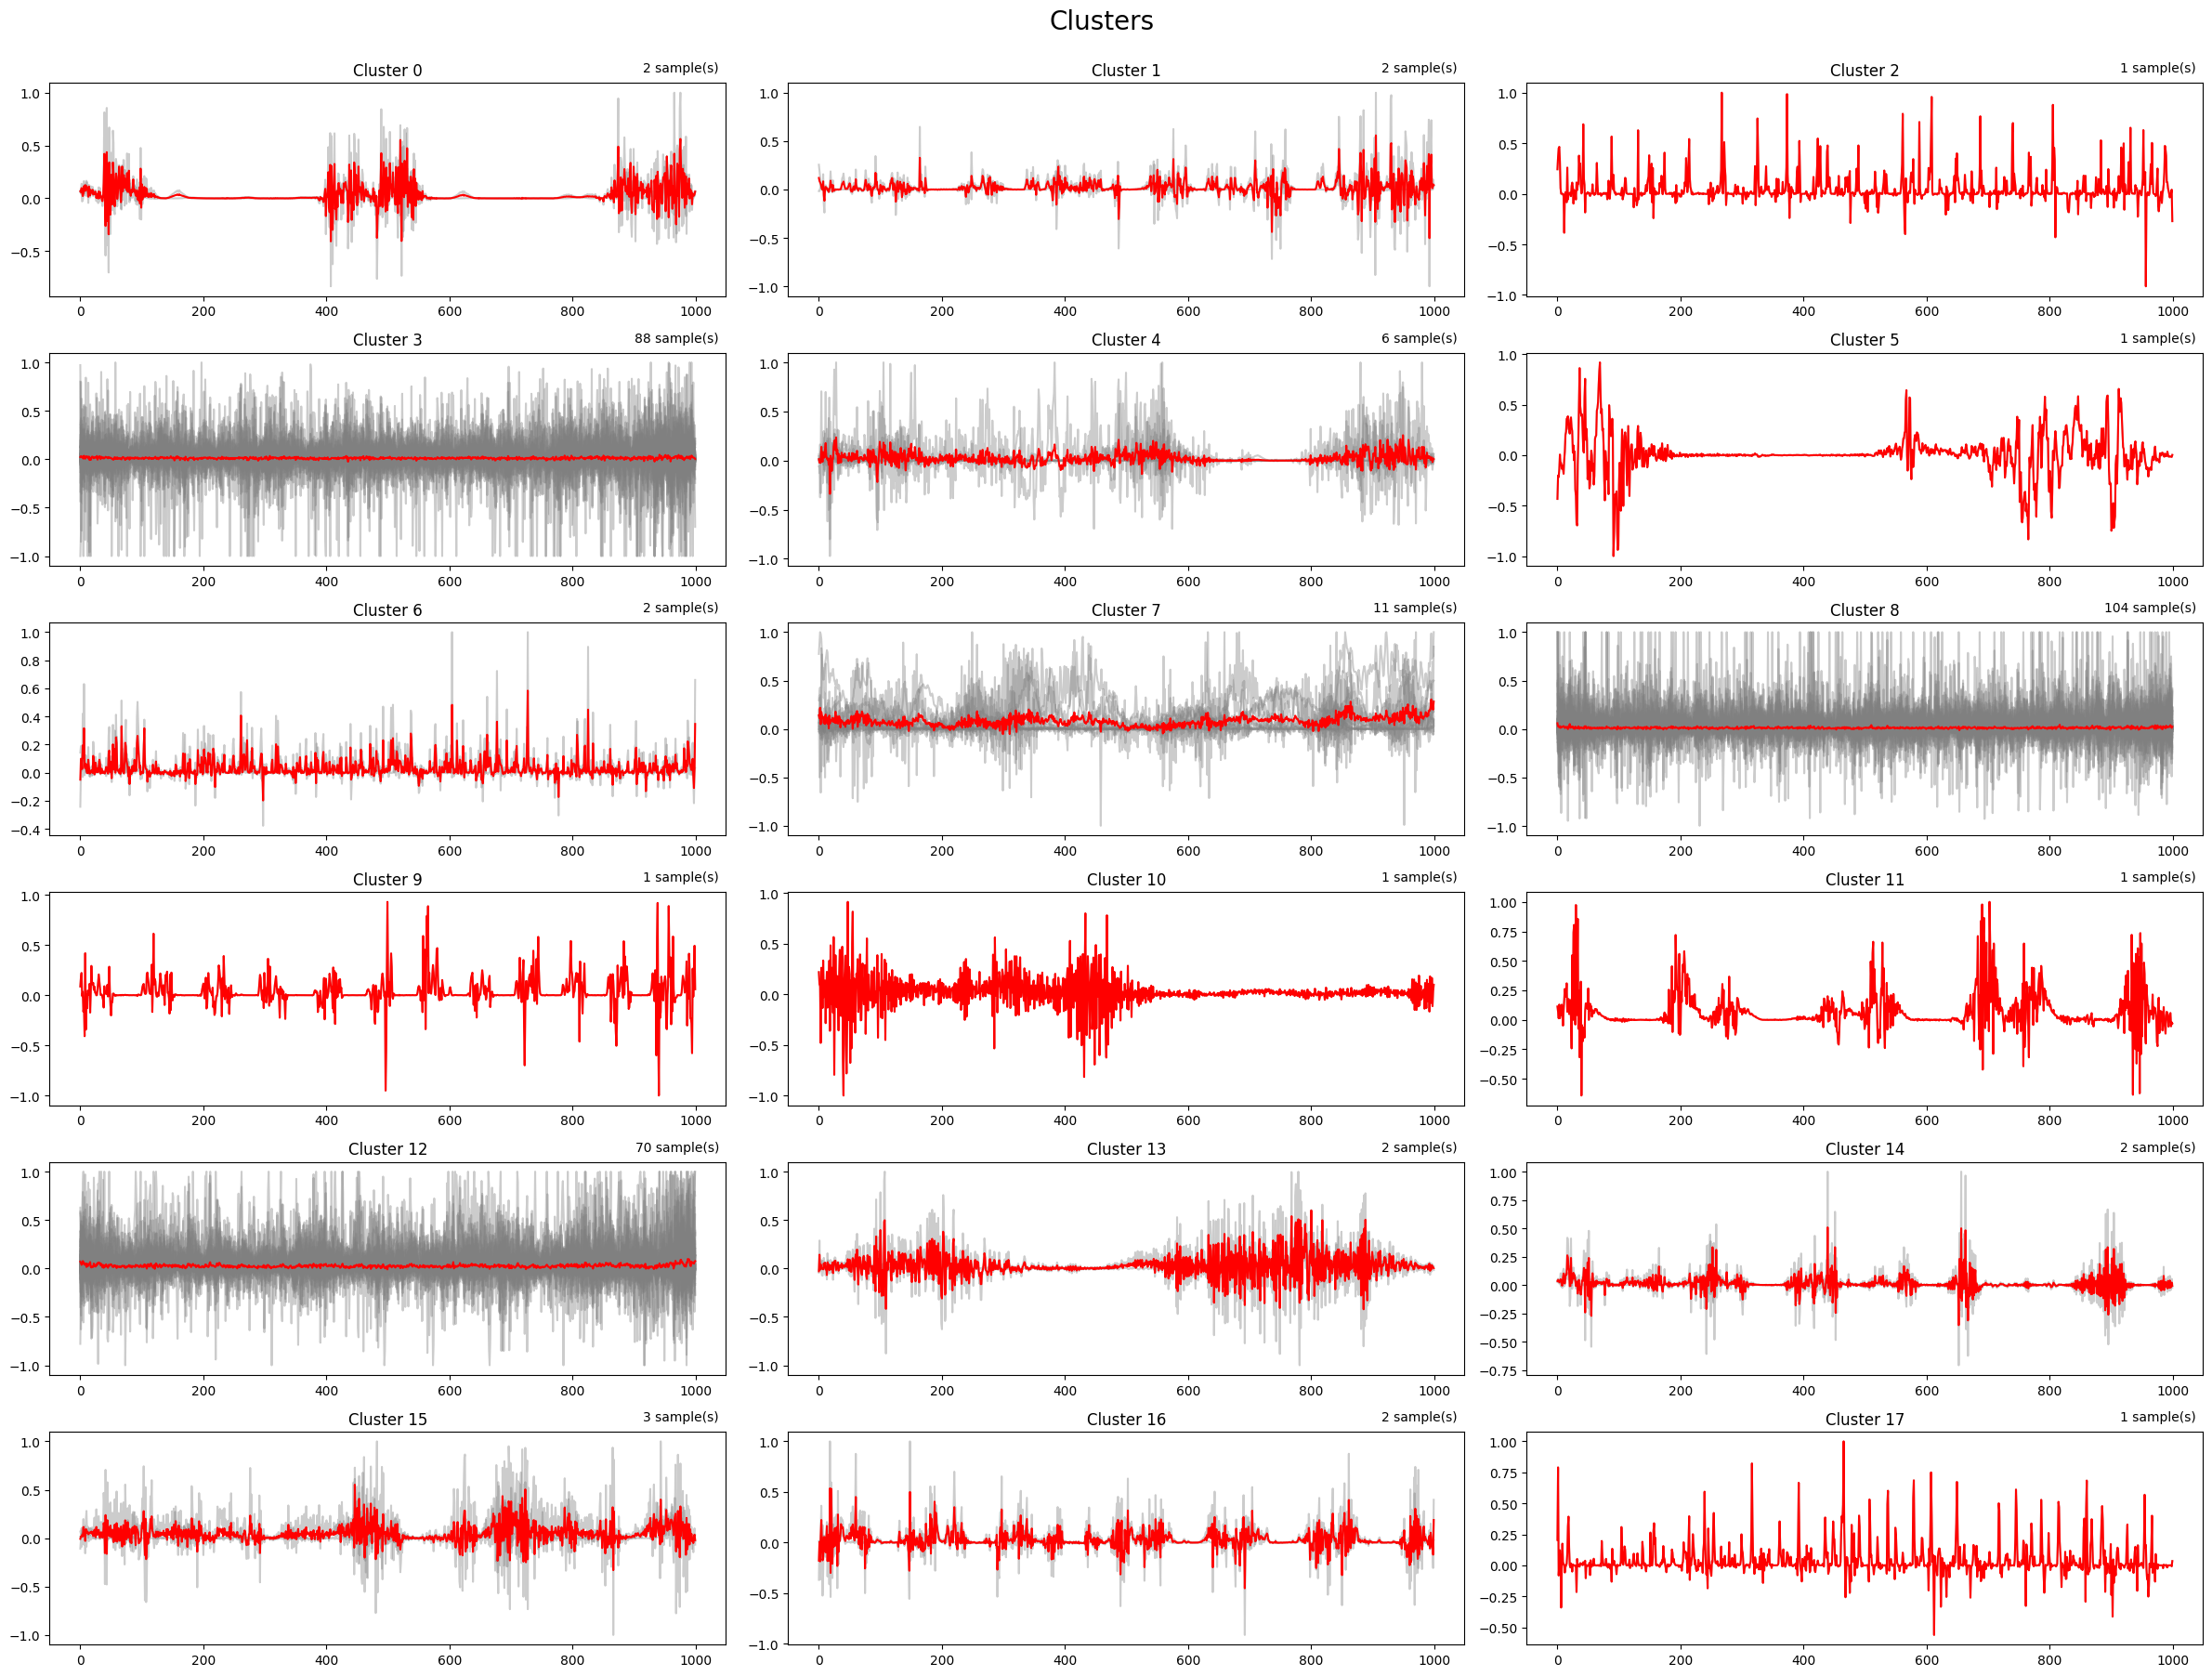

In [27]:
plot_clusters(y_pred, dataset)

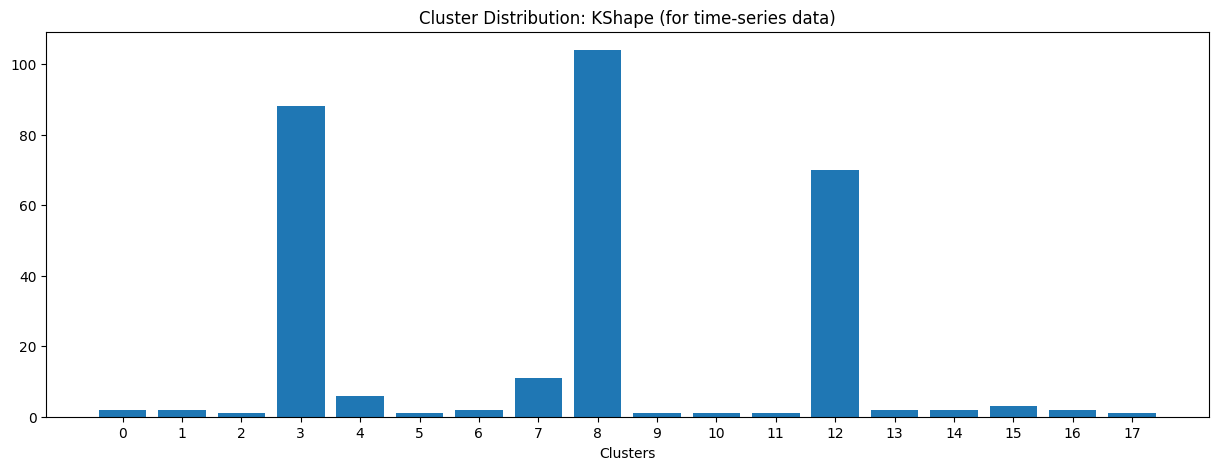

In [29]:
cluster_c = [len(y_pred[y_pred == i]) for i in range(cluster_count)]
cluster_n = [str(i) for i in range(cluster_count)]
plt.figure(figsize=(15, 5))
plt.title("Cluster Distribution: KShape (for time-series data)")
plt.bar(cluster_n, cluster_c)
plt.gca().set_xlabel("Clusters")
plt.show()

We see exactly 3 main cluster and we have exactly 3 classes in our data.
Let's see if the clusters represent a specific class.

<details><summary>Image backup: Cluster Distribution: KShape (for time-series data)</summary>

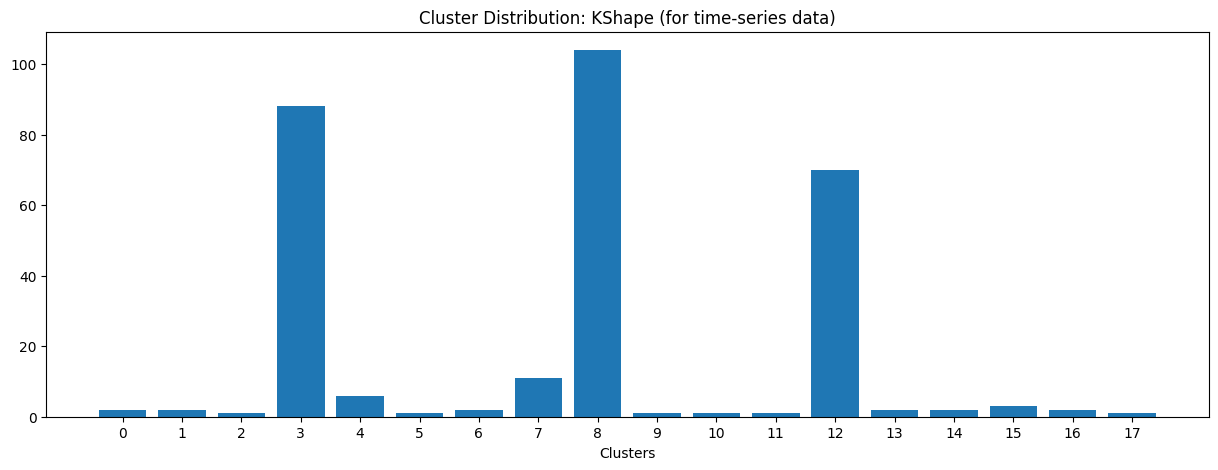

</details>

In [72]:
assert len(datasets_labels) == 3, "The following is optimized for a specific senario containing 3 classes"

In [73]:
targets = np.array(targets)
cluster_3_target_counts = np.unique(targets[np.nonzero(y_pred == 3)], return_counts=True)[1].tolist()
cluster_8_target_counts = np.unique(targets[np.nonzero(y_pred == 8)], return_counts=True)[1].tolist()
cluster_12_target_counts = np.unique(targets[np.nonzero(y_pred == 12)], return_counts=True)[1].tolist()

In [74]:
values = list(zip(cluster_3_target_counts, cluster_8_target_counts, cluster_12_target_counts, strict=True))
target_data = {
    datasets_labels[0]: values[0],
    datasets_labels[1]: values[1],
    datasets_labels[2]: values[2],
}

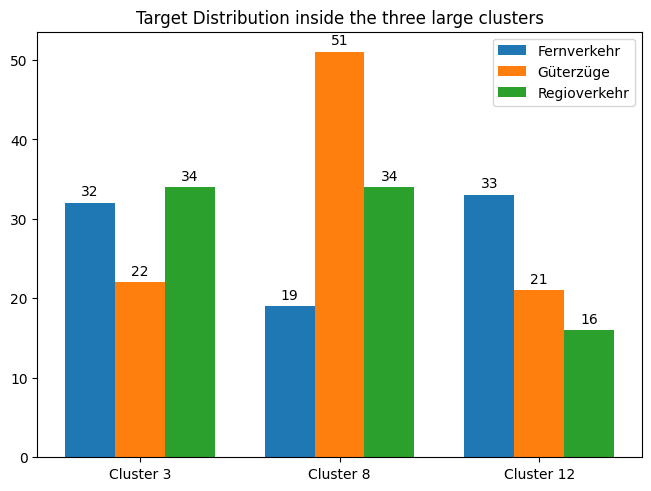

In [75]:
cluster_name = ("Cluster 3", "Cluster 8", "Cluster 12")
x = np.arange(len(cluster_name))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout="constrained")
for name, target_count in target_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, target_count, width, label=name)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_title("Target Distribution inside the three large clusters")
ax.set_xticks(x + width, cluster_name)
ax.legend()
plt.show()

Unfortunately, the 3 main clusters does not each represent a data class.